In [1]:
# Importing Required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Reading dataset
df = pd.read_csv('https://storage.googleapis.com/codehub-data/1-lv2-A-9-bank_credit.csv')
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [12]:
# Checking the shape of dataset
df.shape

(1000, 9)

# EDA

In [4]:
# Checking for null values

In [5]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

In [6]:
# Checking for duplicate rows on dataset

In [9]:
df.duplicated().sum()

0

In [10]:
# Getting general information about datset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


## Data Types

### Numerical Features

In [18]:
numerical_features = [feature for feature in df.columns if df[feature].dtype not in ['o','object','O','Object']]

In [26]:
print("Numerical Features: ", numerical_features, "\nTotal:", len(numerical_features))

Numerical Features:  ['Age', 'Job', 'Credit amount', 'Duration'] 
Total: 4


In [20]:
df[numerical_features].head()

,Age,Job,Credit amount,Duration
0,67,2,1169,6
1,22,2,5951,48
2,49,1,2096,12
3,45,2,7882,42
4,53,2,4870,24


In [29]:
# Getting descraptive information for numerical features

In [33]:
df[numerical_features].describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.0,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


### Categorical Features

In [21]:
categorical_features = [feature for feature in df.columns if df[feature].dtype in ['o','object','O','Object']]

In [27]:
print("Total Number of categorical features: ", categorical_features, "\nTotal: ", len(categorical_features))

Total Number of categorical features:  ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'] 
Total:  5


In [28]:
df[categorical_features].head()

,Sex,Housing,Saving accounts,Checking account,Purpose
0,male,own,NaN,little,radio/TV
1,female,own,little,moderate,radio/TV
2,male,own,little,NaN,education
3,male,free,little,little,furniture/equipment
4,male,free,little,little,car


## Analsing 

### Univeriant Analysis

In [35]:
# Ploting distplot and box plot for each numerical features to chech their distribution

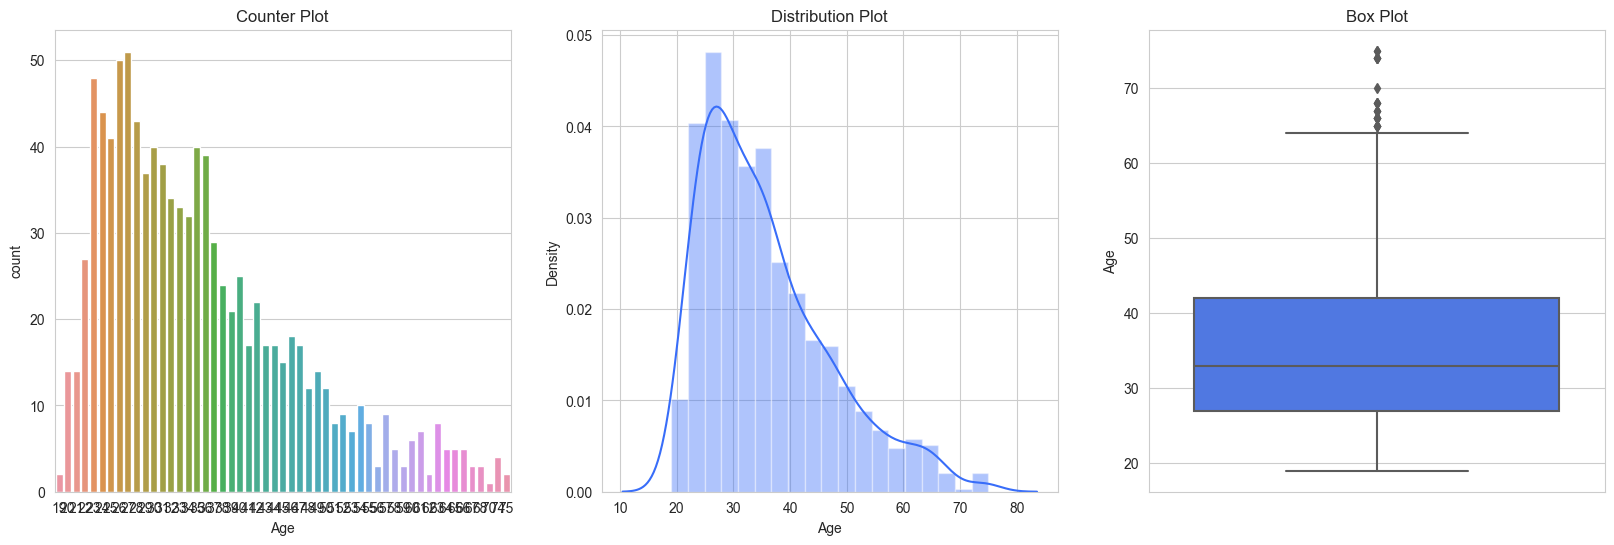

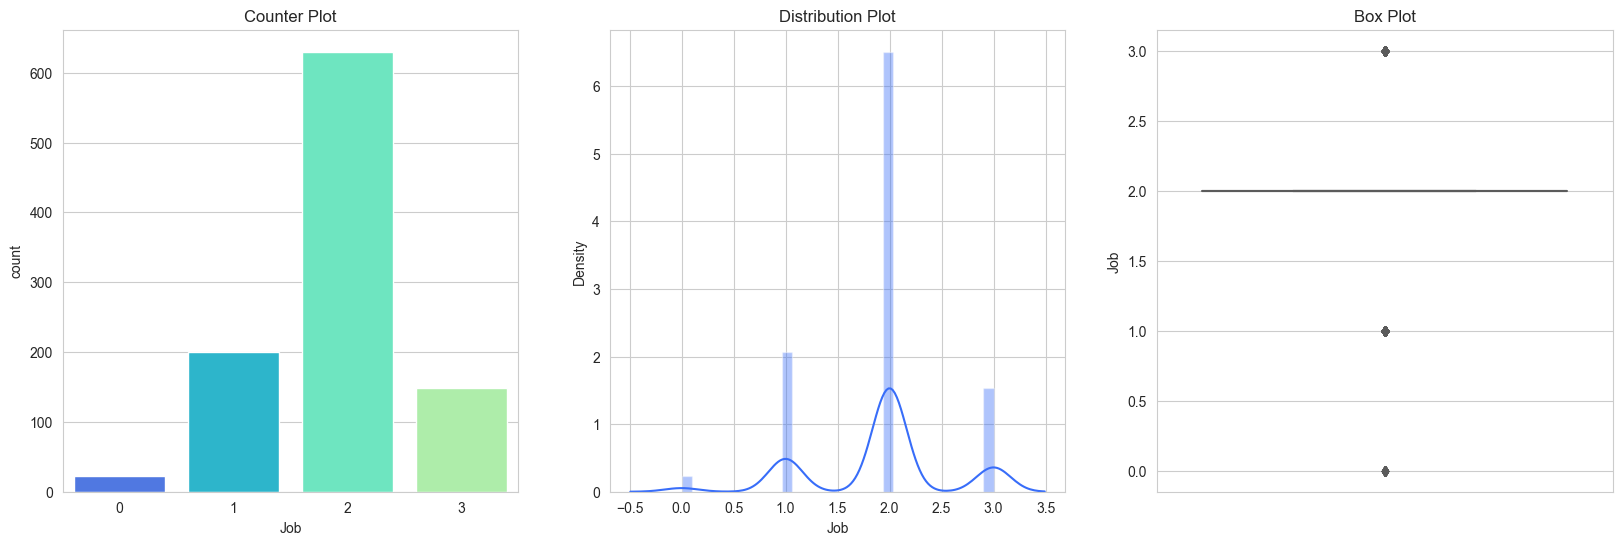

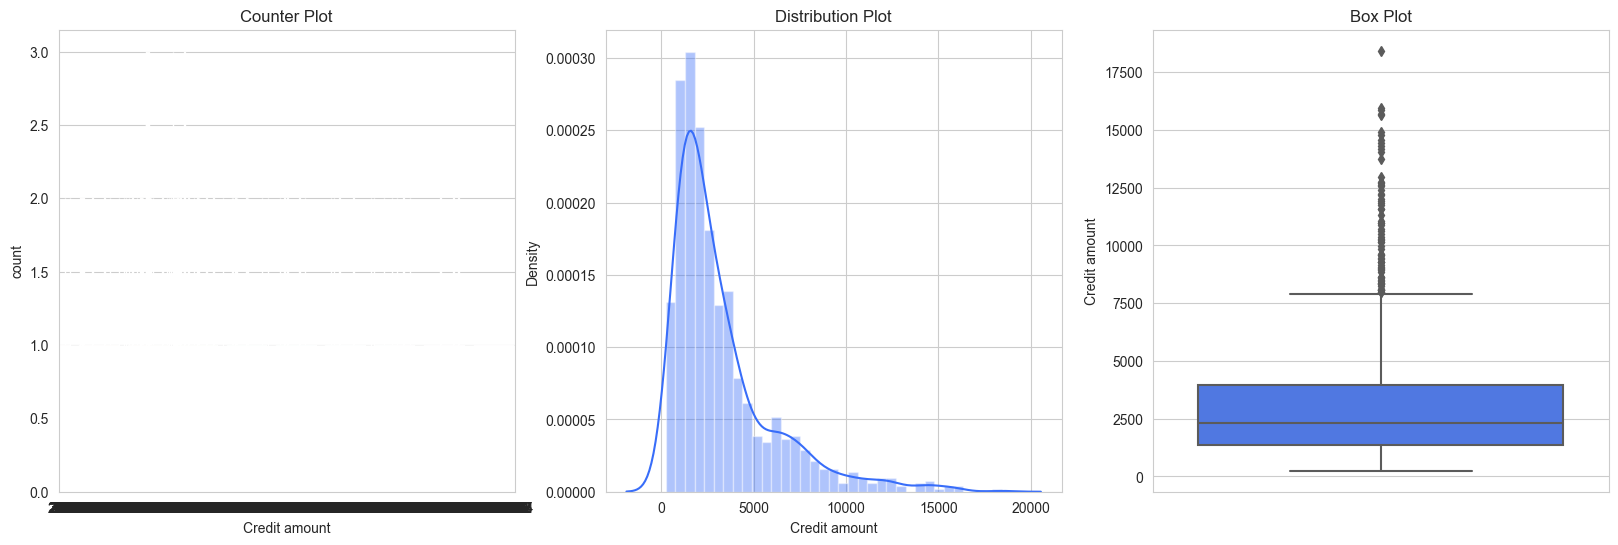

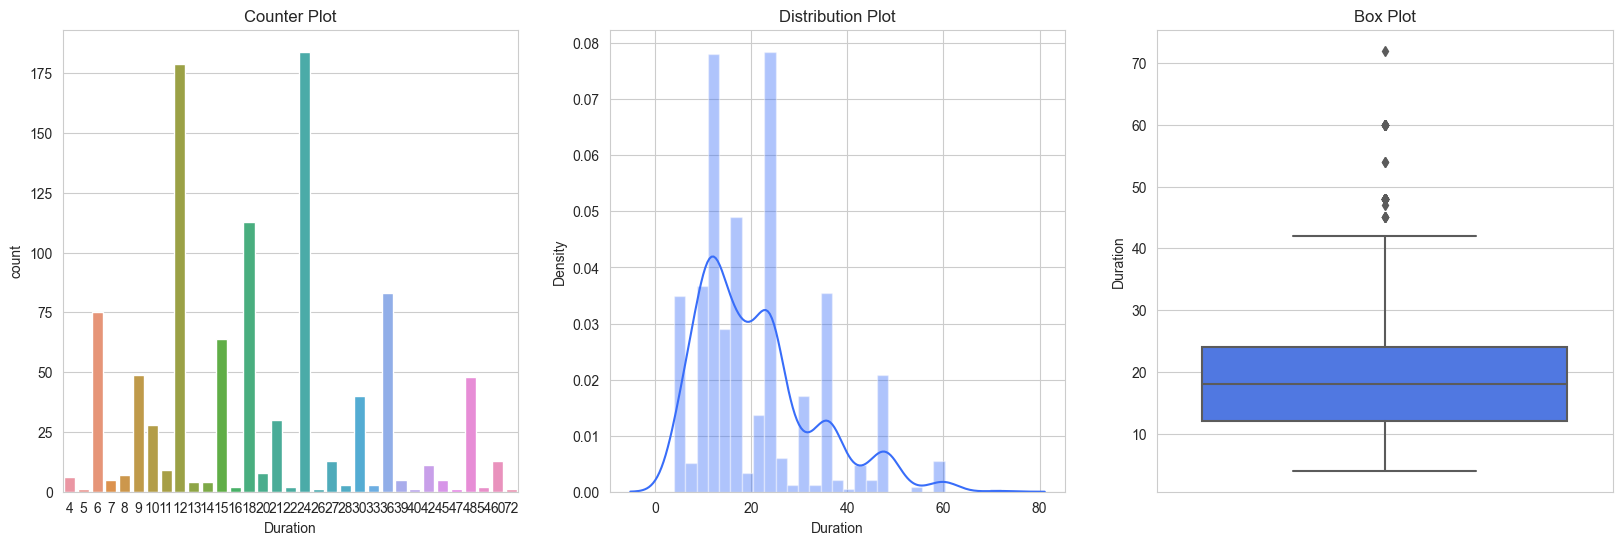

In [44]:
for feature in df[numerical_features]:
    plt.figure(figsize=(20,6))
    
    plt.subplot(1,3,1)
    plt.title("Counter Plot")
    sns.countplot(x = feature, data=df)
    
    plt.subplot(1,3,2)
    plt.title('Distribution Plot')
    sns.distplot(df[feature])
    
    plt.subplot(1,3,3)
    plt.title('Box Plot')
    sns.boxplot(y=df[feature])
    
    plt.show()

In [46]:
### Analysing categorical features

In [47]:
categorical_features

['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

In [52]:
# Finding Unique valuse on each category
for feature in df[categorical_features]:
    print("Unique Value Counts For: ", feature)
    print("-"*60)
    print(df[feature].value_counts())
    print("="*60)

Unique Value Counts For:  Sex
------------------------------------------------------------
male      690
female    310
Name: Sex, dtype: int64
Unique Value Counts For:  Housing
------------------------------------------------------------
own     713
rent    179
free    108
Name: Housing, dtype: int64
Unique Value Counts For:  Saving accounts
------------------------------------------------------------
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64
Unique Value Counts For:  Checking account
------------------------------------------------------------
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64
Unique Value Counts For:  Purpose
------------------------------------------------------------
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/other

In [53]:
df[categorical_features].isnull().sum()

Sex                   0
Housing               0
Saving accounts     183
Checking account    394
Purpose               0
dtype: int64

In [56]:
# Filling nan value with missing string
df["Saving accounts"] = df["Saving accounts"].fillna("Missing")
df["Checking account"] = df["Checking account"].fillna("Missing")

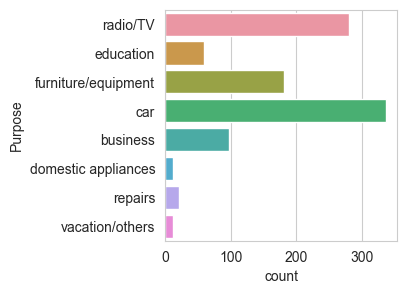

In [75]:
plt.figure(figsize=(3,3))
sns.countplot(y=df["Purpose"], data = df)
plt.show()

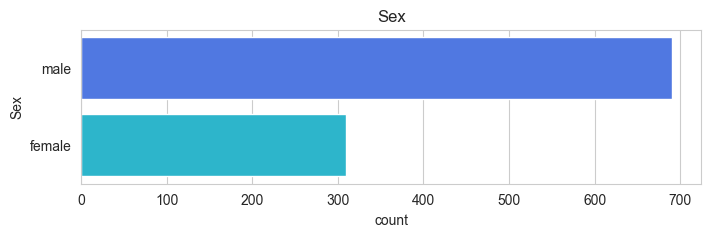

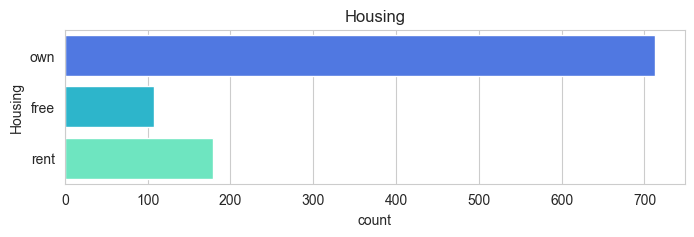

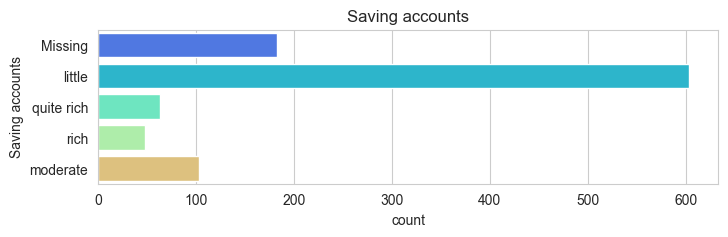

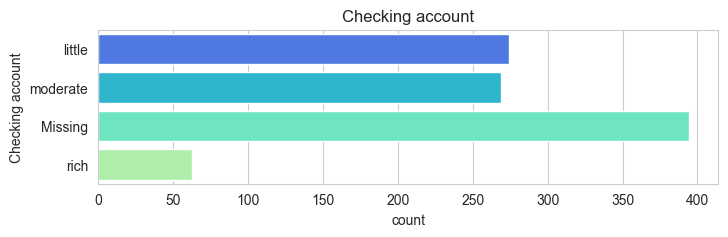

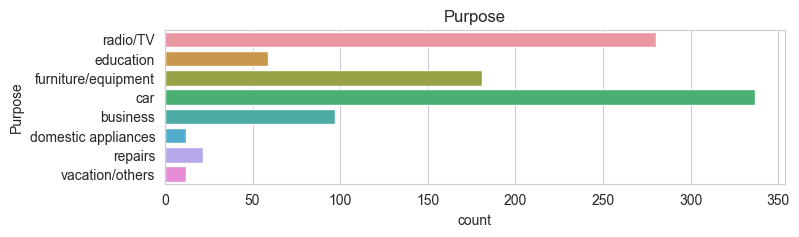

In [81]:
# Now ploting count plot for each of the categorical features
for feature in df[categorical_features]:
    plt.figure(figsize=(8,2))
    sns.countplot(y=df[feature], data = df)
    plt.title(feature)
    plt.show()

In [82]:
# Converting categorical features into numerical features

In [111]:
new_df = pd.get_dummies(df, columns = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose'])
new_df

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_Missing,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
0,67,2,1169,6,0,1,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
1,22,2,5951,48,1,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,49,1,2096,12,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,2,7882,42,0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,53,2,4870,24,0,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,1,1736,12,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
996,40,3,3857,30,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
997,38,2,804,12,0,1,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
998,23,2,1845,45,0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [112]:
# Finding the correlation 

In [113]:
corr = new_df.corr()
corr

,Age,Job,Credit amount,Duration,Sex_female,Sex_male,Housing_free,Housing_own,Housing_rent,Saving accounts_Missing,...,Checking account_moderate,Checking account_rich,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,Purpose_furniture/equipment,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others
Age,1.000000,0.015673,0.032716,-0.036136,-0.161694,0.161694,0.253058,0.006553,-0.212620,0.077811,...,-0.078121,0.037504,-0.001772,0.099919,-0.012562,0.060390,-0.127657,-0.046401,0.039567,0.042365
Job,0.015673,1.000000,0.285385,0.210910,-0.070298,0.070298,0.134972,-0.059393,-0.039195,0.029960,...,-0.004059,-0.050099,0.001614,0.036762,-0.025979,-0.021672,0.013422,-0.027683,-0.092751,0.100544
Credit amount,0.032716,0.285385,1.000000,0.624984,-0.093482,0.093482,0.201643,-0.117497,-0.024611,0.106546,...,0.119612,-0.100510,0.103016,0.125575,-0.069268,-0.034796,-0.034037,-0.173203,-0.028875,0.192893
Duration,-0.036136,0.210910,0.624984,1.000000,-0.081432,0.081432,0.189117,-0.075169,-0.064417,0.071185,...,0.089452,-0.076455,0.164113,-0.005320,-0.037212,-0.025450,-0.062804,-0.044319,-0.022549,0.104516
Sex_female,-0.161694,-0.070298,-0.093482,-0.081432,1.000000,-1.000000,-0.100872,-0.119638,0.222845,-0.043225,...,0.012726,0.004183,-0.080875,-0.047893,0.045275,0.052397,0.100467,-0.008668,-0.026828,-0.014297
Sex_male,0.161694,0.070298,0.093482,0.081432,-1.000000,1.000000,0.100872,0.119638,-0.222845,0.043225,...,-0.012726,-0.004183,0.080875,0.047893,-0.045275,-0.052397,-0.100467,0.008668,0.026828,0.014297
Housing_free,0.253058,0.134972,0.201643,0.189117,-0.100872,0.100872,1.000000,-0.548445,-0.162474,0.026964,...,-0.000378,0.015860,-0.059613,0.126806,-0.038348,0.117976,-0.071530,-0.109357,0.013706,0.080010
Housing_own,0.006553,-0.059393,-0.117497,-0.075169,-0.119638,0.119638,-0.548445,1.000000,-0.735968,-0.002739,...,0.001012,0.018934,0.051083,-0.099526,0.029317,-0.075684,-0.040496,0.134705,0.019803,-0.011288
Housing_rent,-0.212620,-0.039195,-0.024611,-0.064417,0.222845,-0.222845,-0.162474,-0.735968,1.000000,-0.018600,...,-0.000888,-0.035183,-0.012013,0.014773,-0.003546,-0.006211,0.105700,-0.070414,-0.034465,-0.051460
Saving accounts_Missing,0.077811,0.029960,0.106546,0.071185,-0.043225,0.043225,0.026964,-0.002739,-0.018600,1.000000,...,-0.024652,-0.016275,-0.032778,0.067456,0.019096,0.046132,-0.081431,0.004378,-0.035721,-0.004655


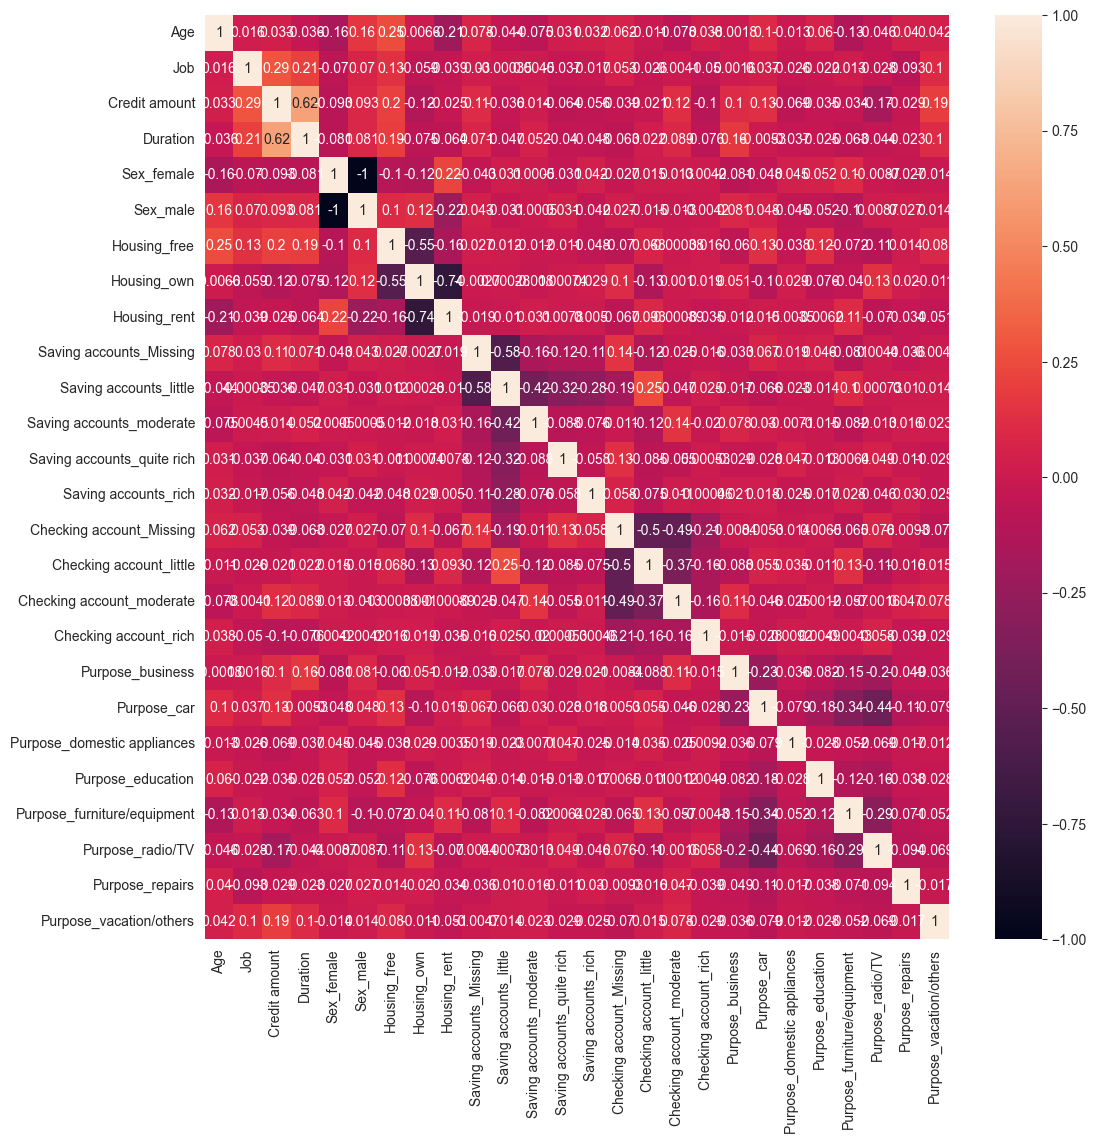

In [116]:
# Headmap
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot = True)
plt.show()

# Model Building 

In [120]:
from sklearn.cluster import KMeans


In [124]:
#Initialize the class object
kmeans = KMeans(n_clusters=4) 

#predict the labels of clusters.
label = kmeans.fit_predict(new_df)

In [125]:
print(label)

[0 1 0 1 2 1 2 1 2 2 0 2 0 0 0 0 0 1 3 2 0 2 0 0 0 0 0 0 0 1 0 2 1 0 0 2 1
 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 2 0 0 1 1 0 1 0 0 0 3 2 2 0 0 0 0 1 0 0 1
 0 0 2 2 1 2 1 0 0 0 0 0 0 3 0 0 0 0 0 2 0 3 0 2 0 1 0 0 0 0 0 3 1 1 1 0 0
 0 1 1 0 2 1 0 2 0 0 2 0 0 0 0 0 0 0 2 1 1 2 0 3 0 1 0 2 0 0 2 2 0 0 2 0 0
 1 0 0 0 1 1 1 0 0 0 2 0 2 0 0 1 0 2 0 0 2 0 0 0 0 0 2 1 2 0 0 0 1 2 0 2 0
 0 2 0 0 2 2 2 2 0 2 0 0 0 2 2 0 0 2 0 0 3 0 0 1 0 2 2 2 0 2 0 2 2 2 0 0 0
 0 2 2 2 3 1 0 2 2 0 0 0 0 0 3 2 0 2 0 0 2 0 2 0 0 0 0 0 0 0 0 2 0 1 2 0 2
 0 0 0 2 2 0 0 1 0 1 0 2 0 3 2 3 2 0 0 2 0 2 0 0 0 2 3 2 1 0 0 0 1 1 2 1 3
 2 0 0 2 0 2 0 0 3 0 2 0 0 0 1 1 2 0 0 2 0 2 0 2 2 0 2 2 0 2 1 0 2 0 1 0 1
 3 2 2 0 0 2 0 1 2 2 2 2 0 0 2 0 0 0 0 2 1 0 0 0 2 0 0 0 2 0 0 0 0 2 2 2 2
 2 1 0 3 3 1 0 0 3 0 0 3 0 0 2 0 0 1 0 0 0 0 2 0 0 3 2 0 0 0 0 0 1 0 2 0 0
 0 2 0 0 1 0 0 0 1 2 1 2 0 2 0 0 0 2 2 2 0 0 0 2 3 0 0 0 0 0 0 2 0 0 0 2 0
 2 0 0 2 0 0 3 0 2 2 2 2 2 2 0 2 2 0 2 0 0 2 0 1 2 2 2 0 0 0 0 2 2 2 0 0 2
 0 2 0 0 0 2 2 0 2 0 1 0 

In [133]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(new_df)
    wcss.append(km.inertia_)

In [134]:
wcss

[7960153512.407003,
 2405441431.7413034,
 1278203943.4552808,
 649875455.5154158,
 467696975.8100394,
 317747224.81929284,
 232706230.4551466,
 182929028.28812262,
 148532551.85164547,
 116800774.39882803]

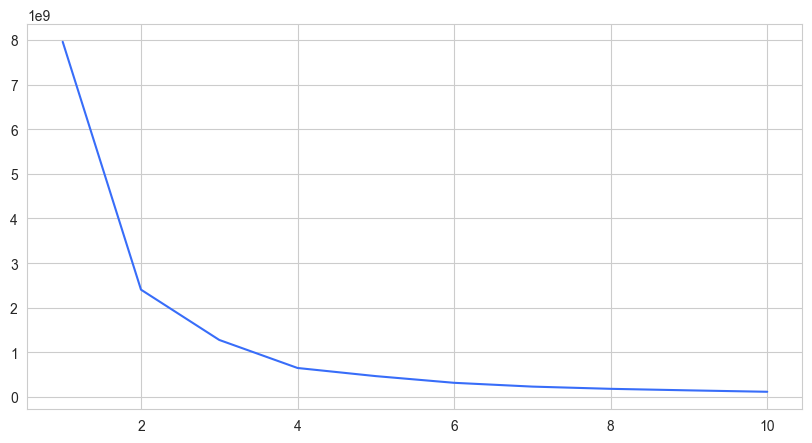

In [135]:
plt.plot(range(1,11),wcss)